# Data Analysis with Pandas — Day 1
## Exploratory Data Analysis

This is the Day 1 notebook for the June 2021 course "Data Analysis with Pandas," part of the [Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html).

In this lesson, we're going to introduce the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover:

* The Essential Structures of Pandas
* How to Read in Data
* How to Explore and Filter Data
* How to Make Simple Plots

___

## Dataset
### Seattle Public Library Book Circulation Data

We will be working with book circulation data from the Seattle Public Library. The SPL makes its [circulation data available to the public](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6/data#revert) in anonymized form. The dataset includes items that were checked out more than 20 times a month in 2020 and 2021.

For more information about the columns in this dataset, see https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6the
___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [2]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`.

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [149]:
pd.options.display.max_rows = 60
pd.options.display.max_colwidth = 100

## How to Read in Data

| File Type | Pandas Method  |             
|----------|---------| 
| CSV file    | `pd.read(filepath)` |
| TSV file    | `pd.read(filepath, delimiter='\t')` |
|  Excel file     | `pd.read_excel(filepath)` |    
|  JSON file     | `pd.read_json(filepath)`, `pd.json_normalize()` |    

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [150]:
pd.read_csv('Seattle-Library_2020-2021.csv', delimiter=",", encoding="utf-8")

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
1,The Grammarians: A Novel,Cathleen Schine,40,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2,The Scent Keeper: A Novel,Erica Bauermeister,50,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
4,Vacationland: True Stories from Painful Beaches,John Hodgman,34,2020-01,EBOOK,2017,"Biography & Autobiography, Nonfiction, Performing Arts, Travel","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...,...
34228,Why We Sleep: Unlocking the Power of Sleep and Dreams,Matthew Walker,111,2021-02,EBOOK,2017,"Health & Fitness, Nonfiction, Psychology, Science","Simon & Schuster, Inc.",OverDrive,2021,2,Digital
34229,The Topeka School: A Novel,Ben Lerner,45,2021-02,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2021,2,Digital
34230,"Eddie's Boy: The Butcher's Boy Novels, Book 4",Thomas Perry,26,2021-02,EBOOK,2020,"Fiction, Mystery, Suspense, Thriller",Open Road Integrated Media,OverDrive,2021,2,Digital
34231,How to Win Friends and Influence People,Dale Carnegie,21,2021-02,EBOOK,2014,"Business, Nonfiction, Psychology, Self Help","Simon & Schuster, Inc.",OverDrive,2021,2,Digital


This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *seattle_df*.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset.

## How to Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [86]:
seattle_df = pd.read_csv('Seattle-Library_2020-2021.csv', delimiter=",", encoding="utf-8")

In [151]:
seattle_df

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
1,The Grammarians: A Novel,Cathleen Schine,40,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2,The Scent Keeper: A Novel,Erica Bauermeister,50,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
4,Vacationland: True Stories from Painful Beaches,John Hodgman,34,2020-01,EBOOK,2017,"Biography & Autobiography, Nonfiction, Performing Arts, Travel","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...,...
34228,Why We Sleep: Unlocking the Power of Sleep and Dreams,Matthew Walker,111,2021-02,EBOOK,2017,"Health & Fitness, Nonfiction, Psychology, Science","Simon & Schuster, Inc.",OverDrive,2021,2,Digital
34229,The Topeka School: A Novel,Ben Lerner,45,2021-02,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2021,2,Digital
34230,"Eddie's Boy: The Butcher's Boy Novels, Book 4",Thomas Perry,26,2021-02,EBOOK,2020,"Fiction, Mystery, Suspense, Thriller",Open Road Integrated Media,OverDrive,2021,2,Digital
34231,How to Win Friends and Influence People,Dale Carnegie,21,2021-02,EBOOK,2014,"Business, Nonfiction, Psychology, Self Help","Simon & Schuster, Inc.",OverDrive,2021,2,Digital


We can also examine the first *n* number of rows by using `.head(n)`.

In [88]:
seattle_df.head(5)

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
1,The Grammarians: A Novel,Cathleen Schine,40,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2,The Scent Keeper: A Novel,Erica Bauermeister,50,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
4,Vacationland: True Stories from Painful Beaches,John Hodgman,34,2020-01,EBOOK,2017,"Biography & Autobiography, Nonfiction, Perform...","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital


Sometimes we want to see data beyond the first few rows, however. To display a random number of rows, we can use `.sample()`.

In [89]:
seattle_df.sample(5)

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
28933,"Sisters: Smile Series, Book 2",Raina Telgemeier,71,2020-12,EBOOK,2015,"Comic and Graphic Books, Juvenile Fiction","Scholastic, Inc. (US)",OverDrive,2020,12,Digital
12020,Quiet: The Power of Introverts in a World That...,Susan Cain,39,2020-05,AUDIOBOOK,2017,"Nonfiction, Sociology",Books on Tape,OverDrive,2020,5,Digital
16961,The Last Black Unicorn (Unabridged),Tiffany Haddish,53,2020-07,AUDIOBOOK,2017,"Biography & Autobiography, Essays, Humor (Nonf...",Simon & Schuster - Audiobooks,OverDrive,2020,7,Digital
4836,The Power of Habit: Why We Do What We Do in Li...,Charles Duhigg,143,2020-02,AUDIOBOOK,2012,"Business, Nonfiction, Psychology, Self-Improve...",Books on Tape,OverDrive,2020,2,Digital
17396,My Grandmother Asked Me to Tell You She's Sorr...,Fredrik Backman,48,2020-07,AUDIOBOOK,2015,"Fiction, Humor (Fiction), Literature",Simon & Schuster - Audiobooks,OverDrive,2020,7,Digital


Go ahead and run it a few times to see how the displayed rows change!

## Exploratory Data Analysis

Ok so what's actually in this Seattle Public Library dataset? What categories are included? What time period(s) does it cover? Is there missing data? Is there messy data?

To get important information about all the columns in a DataFrame, we can use `.info()`.

In [93]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34233 entries, 0 to 34232
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              34233 non-null  object
 1   Creator            31701 non-null  object
 2   Checkouts          34233 non-null  int64 
 3   CheckoutMonthYear  34233 non-null  object
 4   MaterialType       34233 non-null  object
 5   PublicationYear    34162 non-null  object
 6   Subjects           34156 non-null  object
 7   Publisher          34184 non-null  object
 8   CheckoutType       34233 non-null  object
 9   CheckoutYear       34233 non-null  int64 
 10  CheckoutMonth      34233 non-null  int64 
 11  UsageClass         34233 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


Just like Python has different data types, Pandas has different data types, too.

These data types are automatically assigned to columns when we read in a file.



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

We can also check these Pandas data types explicitly with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).

In [155]:
seattle_df.dtypes

Title                object
Creator              object
Checkouts             int64
CheckoutMonthYear    object
MaterialType         object
PublicationYear      object
Subjects             object
Publisher            object
CheckoutType         object
CheckoutYear          int64
CheckoutMonth         int64
UsageClass           object
dtype: object

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

By default, `describe()` will only work on numerical columns, but we can ask it to describe all columns with `include='all'`

In [92]:
seattle_df.describe(include='all')

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
count,34233,31701,34233.000000,34233,34233,34162,34156,34184,34233,34233.000000,34233.000000,34233
unique,7685,3225,NaN,14,11,131,3687,848,2,NaN,NaN,2
top,"Little Women: Little Women Series, Book 1","Willems, Mo",NaN,2020-01,EBOOK,2019,"Fiction, Literature","Random House, Inc.",OverDrive,NaN,NaN,Digital
freq,22,224,NaN,4180,16174,6555,2874,4605,27348,NaN,NaN,27348
mean,NaN,NaN,51.666988,NaN,NaN,NaN,NaN,NaN,NaN,2020.148629,5.350831,NaN
std,NaN,NaN,67.480043,NaN,NaN,NaN,NaN,NaN,NaN,0.355727,3.819019,NaN
min,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,1.000000,NaN
25%,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,2.000000,NaN
50%,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,5.000000,NaN
75%,NaN,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,9.000000,NaN


`NaN` is the Pandas value for any missing data. We'll cover this in more detail later, but you can read ["Working with missing data"](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan) for more information.

Lastly, you can create a histogram of numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f904ca82c90>,
      dtype=object)

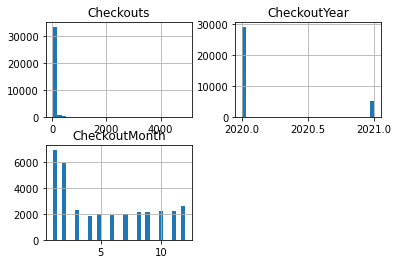

In [103]:
seattle_df.hist()

## What are some questions, patterns, outliers, or problems with this data?

By using `.sample()` and `.describe()`, try to identify what you think are important patterns, outliers, or problems with this dataset.

In [ ]:
# Use sample

In [ ]:
# Use describe

## Pandas Essentials — DataFrame vs Series

There are two main types of data structures in Pandas, *DataFrame* objects and *Series* objects.

| Pandas objects | Looks like...  |   Dimensions | Aesthetic                   |
|----------|---------| ----- | -----|
| `DataFrame`    | A spreadsheet | 2-dimensional |  Pretty, nicely formatted table |
| `Series`      | A single column | 1-dimensional | Not as pretty output   |                

This is a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), which looks and acts a lot like a spreadsheet.

In [152]:
seattle_df

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
1,The Grammarians: A Novel,Cathleen Schine,40,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2,The Scent Keeper: A Novel,Erica Bauermeister,50,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
4,Vacationland: True Stories from Painful Beaches,John Hodgman,34,2020-01,EBOOK,2017,"Biography & Autobiography, Nonfiction, Performing Arts, Travel","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...,...
34228,Why We Sleep: Unlocking the Power of Sleep and Dreams,Matthew Walker,111,2021-02,EBOOK,2017,"Health & Fitness, Nonfiction, Psychology, Science","Simon & Schuster, Inc.",OverDrive,2021,2,Digital
34229,The Topeka School: A Novel,Ben Lerner,45,2021-02,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2021,2,Digital
34230,"Eddie's Boy: The Butcher's Boy Novels, Book 4",Thomas Perry,26,2021-02,EBOOK,2020,"Fiction, Mystery, Suspense, Thriller",Open Road Integrated Media,OverDrive,2021,2,Digital
34231,How to Win Friends and Influence People,Dale Carnegie,21,2021-02,EBOOK,2014,"Business, Nonfiction, Psychology, Self Help","Simon & Schuster, Inc.",OverDrive,2021,2,Digital


We can confirm that this is a DataFrame by using the built-in Python function `type()`.

In [19]:
type(seattle_df)

pandas.core.frame.DataFrame

This is a Series object, a single column from the DataFrame, which we can access with square brackets and the name of the column in quotation marks.

In [20]:
seattle_df['MaterialType']

0        EBOOK
1        EBOOK
2        EBOOK
3         BOOK
4        EBOOK
         ...  
34228    EBOOK
34229    EBOOK
34230    EBOOK
34231    EBOOK
34232    EBOOK
Name: MaterialType, Length: 34233, dtype: object

A Series object displays differently than a DataFrame object. 

In [25]:
type(seattle_df['MaterialType'])

pandas.core.series.Series

There are actually *two* differents ways of accessing a column or Series object, with square brackets or with dot notation.

In [104]:
seattle_df.MaterialType

0        EBOOK
1        EBOOK
2        EBOOK
3         BOOK
4        EBOOK
         ...  
34228    EBOOK
34229    EBOOK
34230    EBOOK
34231    EBOOK
34232    EBOOK
Name: MaterialType, Length: 34233, dtype: object

In [105]:
type(seattle_df.MaterialType)

pandas.core.series.Series

In [157]:
seattle_df['Checkouts'].max()

4903

In [159]:
seattle_df['Checkouts'].mean()

51.66698799404084

In [161]:
seattle_df[['Publisher', 'MaterialType']]

,Publisher,MaterialType
0,"Penguin Group (USA), Inc.",EBOOK
1,Macmillan Publishers,EBOOK
2,Macmillan Publishers,EBOOK
3,"Alfred A. Knopf,",BOOK
4,"Penguin Group (USA), Inc.",EBOOK
...,...,...
34228,"Simon & Schuster, Inc.",EBOOK
34229,Macmillan Publishers,EBOOK
34230,Open Road Integrated Media,EBOOK
34231,"Simon & Schuster, Inc.",EBOOK


## Pandas Essentials — The Index

In [107]:
seattle_df.head(3)

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
1,The Grammarians: A Novel,Cathleen Schine,40,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2,The Scent Keeper: A Novel,Erica Bauermeister,50,2020-05,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital


In [31]:
seattle_df.index

RangeIndex(start=0, stop=34233, step=1)

In [30]:
type(seattle_df.index)

pandas.core.indexes.range.RangeIndex

We can access rows by indexing them with `.iloc`

In [162]:
seattle_df.iloc[0]

Title                              Eileen: A Novel
Creator                           Ottessa Moshfegh
Checkouts                                       23
CheckoutMonthYear                          2020-04
MaterialType                                 EBOOK
PublicationYear                               2015
Subjects             Fiction, Literature, Thriller
Publisher                Penguin Group (USA), Inc.
CheckoutType                             OverDrive
CheckoutYear                                  2020
CheckoutMonth                                    4
UsageClass                                 Digital
Name: 0, dtype: object

In [163]:
seattle_df.iloc[[0]]

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
0,Eileen: A Novel,Ottessa Moshfegh,23,2020-04,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital


In [164]:
seattle_df.iloc[1]

Title                The Grammarians: A Novel
Creator                       Cathleen Schine
Checkouts                                  40
CheckoutMonthYear                     2020-05
MaterialType                            EBOOK
PublicationYear                          2019
Subjects                  Fiction, Literature
Publisher                Macmillan Publishers
CheckoutType                        OverDrive
CheckoutYear                             2020
CheckoutMonth                               5
UsageClass                            Digital
Name: 1, dtype: object

In [165]:
seattle_df.iloc[2]

Title                The Scent Keeper: A Novel
Creator                     Erica Bauermeister
Checkouts                                   50
CheckoutMonthYear                      2020-05
MaterialType                             EBOOK
PublicationYear                           2019
Subjects                   Fiction, Literature
Publisher                 Macmillan Publishers
CheckoutType                         OverDrive
CheckoutYear                              2020
CheckoutMonth                                5
UsageClass                             Digital
Name: 2, dtype: object

### Set Index

In [115]:
seattle_df.set_index('CheckoutMonthYear')

,Title,Creator,Checkouts,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
CheckoutMonthYear,,,,,,,,,,,
2020-04,Eileen: A Novel,Ottessa Moshfegh,23,EBOOK,2015,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",OverDrive,2020,4,Digital
2020-05,The Grammarians: A Novel,Cathleen Schine,40,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2020-05,The Scent Keeper: A Novel,Erica Bauermeister,50,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2020,5,Digital
2020-01,Exhalation / Ted Chiang.,"Chiang, Ted",355,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
2020-01,Vacationland: True Stories from Painful Beaches,John Hodgman,34,EBOOK,2017,"Biography & Autobiography, Nonfiction, Performing Arts, Travel","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...
2021-02,Why We Sleep: Unlocking the Power of Sleep and Dreams,Matthew Walker,111,EBOOK,2017,"Health & Fitness, Nonfiction, Psychology, Science","Simon & Schuster, Inc.",OverDrive,2021,2,Digital
2021-02,The Topeka School: A Novel,Ben Lerner,45,EBOOK,2019,"Fiction, Literature",Macmillan Publishers,OverDrive,2021,2,Digital
2021-02,"Eddie's Boy: The Butcher's Boy Novels, Book 4",Thomas Perry,26,EBOOK,2020,"Fiction, Mystery, Suspense, Thriller",Open Road Integrated Media,OverDrive,2021,2,Digital


`.loc` 

In [125]:
seattle_df.set_index('CheckoutMonthYear').loc[['2020-01']]

,Title,Creator,Checkouts,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
CheckoutMonthYear,,,,,,,,,,,
2020-01,Exhalation / Ted Chiang.,"Chiang, Ted",355,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
2020-01,Vacationland: True Stories from Painful Beaches,John Hodgman,34,EBOOK,2017,"Biography & Autobiography, Nonfiction, Performing Arts, Travel","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
2020-01,"Outer Order, Inner Calm: Declutter and Organize to Make More Room for Happiness (unabridged) (Un...",Gretchen Rubin,23,AUDIOBOOK,2019,"Home Design & Décor, New Age, Nonfiction, Self-Improvement",Books on Tape,OverDrive,2020,1,Digital
2020-01,Front Desk (Unabridged),Kelly Yang,54,AUDIOBOOK,2018,"Juvenile Fiction, Juvenile Literature",Books on Tape,OverDrive,2020,1,Digital
2020-01,"Enlightenment Now: The Case for Reason, Science, Humanism, and Progress (unabridged) (Unabridged)",Steven Pinker,55,AUDIOBOOK,2018,"Nonfiction, Psychology, Science, Sociology",Books on Tape,OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...
2020-01,"Target: Alex Cross: Alex Cross Series, Book 26",James Patterson,38,EBOOK,2018,"Fiction, Mystery, Thriller","Hachette Digital, Inc.",OverDrive,2020,1,Digital
2020-01,Shakespeare & Hathaway : private investigators. Season one / BBC ; BBC Studios in association wi...,NaN,24,VIDEODISC,[2019],"Private investigators England Drama, Murder England Drama, Television series, Detective and myst...","BBC,",Horizon,2020,1,Physical
2020-01,"I have a dream / Martin Luther King, Jr. ; paintings by Kadir Nelson.","King, Martin Luther, Jr., 1929-1968",29,BOOK,[2012],"March on Washington for Jobs and Freedom 1963 Washington D C Juvenile literature, African Americ...","Schwartz & Wade Books,",Horizon,2020,1,Physical


### Reset Index

In [127]:
seattle_df['MaterialType'].value_counts().reset_index()

,index,MaterialType
0,EBOOK,16174
1,AUDIOBOOK,11174
2,BOOK,4340
3,VIDEODISC,2384
4,SOUNDDISC,97
5,REGPRINT,35
6,MIXED,21
7,CR,4
8,ER,2
9,LARGEPRINT,1


## How to Query Data — Selections, Subsets, and Filters

The following table is taken from the [Pandas website](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#indexing-selection):

<table class="colwidths-given table">
<colgroup>
<col style="width: 50%">
<col style="width: 33%">
<col style="width: 17%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Operation</p></th>
<th class="head"><p>Syntax</p></th>
<th class="head"><p>Result</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Select column</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df[col]</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-odd"><td><p>Select row by label</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df.loc[label]</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-even"><td><p>Select row by integer location</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df.iloc[loc]</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-odd"><td><p>Select rows by filter or "boolean vector"</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df[filter/boolean]</span></code></p></td>
<td><p>DataFrame</p></td>
</tr>
</tbody>
</table>

Select by column

In [42]:
seattle_df['MaterialType']

0        EBOOK
1        EBOOK
2        EBOOK
3         BOOK
4        EBOOK
         ...  
34228    EBOOK
34229    EBOOK
34230    EBOOK
34231    EBOOK
34232    EBOOK
Name: MaterialType, Length: 34233, dtype: object

Boolean vector returns a Series of True/False statements 

In [56]:
seattle_df['MaterialType'] == 'BOOK'

0        False
1        False
2        False
3         True
4        False
         ...  
34228    False
34229    False
34230    False
34231    False
34232    False
Name: MaterialType, Length: 34233, dtype: bool

Select by filter or "boolean vector"

In [128]:
book_filter = seattle_df['MaterialType'] == 'BOOK'
seattle_df[book_filter]

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
10,Camp / by Kayla Miller.,"Miller, Kayla",38,2020-01,BOOK,[2019],"Friendship Comic books strips etc, Camps Comic books strips etc, Interpersonal relations Comic b...","Houghton Mifflin Harcourt,",Horizon,2020,1,Physical
14,The snowy day.,"Keats, Ezra Jack",60,2020-01,BOOK,[1962],"Snow Juvenile fiction, African Americans Juvenile fiction","Viking Press,",Horizon,2020,1,Physical
15,Harry Potter and the goblet of fire / J.K. Rowling ; illustrated by Jim Kay.,"Rowling, J. K.",31,2020-01,BOOK,2019,"Potter Harry Fictitious character Juvenile fiction, Granger Hermione Fictitious character Juveni...","Scholastic Inc.,",Horizon,2020,1,Physical
18,One day in December : a novel / Josie Silver.,"Silver, Josie",23,2020-01,BOOK,[2018],"Friendship Fiction, Best friends Fiction, Man woman relationships Fiction, Face Psychological as...","Broadway Books,",Horizon,2020,1,Physical
...,...,...,...,...,...,...,...,...,...,...,...,...
34176,Extra yarn / by Mac Barnett ; illustrated by Jon Klassen.,"Barnett, Mac",21,2021-02,BOOK,[2012],"Yarn Juvenile fiction, Knitting Juvenile fiction, Humorous stories","Balzer + Bray,",Horizon,2021,2,Physical
34200,All the devils are here / Louise Penny.,"Penny, Louise",86,2021-02,BOOK,2020,"Gamache Armand Fictitious character Fiction, Billionaires Fiction, Attempted murder Fiction, Con...","Minotaur Books, an imprint of St. Martin's Publishing Group,",Horizon,2021,2,Physical
34206,A big guy took my ball! / by Mo Willems.,"Willems, Mo",38,2021-02,BOOK,[2013],"Gerald Fictitious character Willems Juvenile fiction, Piggie Fictitious character Willems Juveni...","Hyperion Books for Children,",Horizon,2021,2,Physical
34216,I am invited to a party! / by Mo Willems.,"Willems, Mo",21,2021-02,BOOK,[2007],"Gerald Fictitious character Willems Juvenile fiction, Piggie Fictitious character Willems Juveni...","Hyperion Books for Children,",Horizon,2021,2,Physical


`.loc`

In [153]:
book_filter = seattle_df['MaterialType'] == 'BOOK'
seattle_df.loc[book_filter]

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
10,Camp / by Kayla Miller.,"Miller, Kayla",38,2020-01,BOOK,[2019],"Friendship Comic books strips etc, Camps Comic books strips etc, Interpersonal relations Comic b...","Houghton Mifflin Harcourt,",Horizon,2020,1,Physical
14,The snowy day.,"Keats, Ezra Jack",60,2020-01,BOOK,[1962],"Snow Juvenile fiction, African Americans Juvenile fiction","Viking Press,",Horizon,2020,1,Physical
15,Harry Potter and the goblet of fire / J.K. Rowling ; illustrated by Jim Kay.,"Rowling, J. K.",31,2020-01,BOOK,2019,"Potter Harry Fictitious character Juvenile fiction, Granger Hermione Fictitious character Juveni...","Scholastic Inc.,",Horizon,2020,1,Physical
18,One day in December : a novel / Josie Silver.,"Silver, Josie",23,2020-01,BOOK,[2018],"Friendship Fiction, Best friends Fiction, Man woman relationships Fiction, Face Psychological as...","Broadway Books,",Horizon,2020,1,Physical
...,...,...,...,...,...,...,...,...,...,...,...,...
34176,Extra yarn / by Mac Barnett ; illustrated by Jon Klassen.,"Barnett, Mac",21,2021-02,BOOK,[2012],"Yarn Juvenile fiction, Knitting Juvenile fiction, Humorous stories","Balzer + Bray,",Horizon,2021,2,Physical
34200,All the devils are here / Louise Penny.,"Penny, Louise",86,2021-02,BOOK,2020,"Gamache Armand Fictitious character Fiction, Billionaires Fiction, Attempted murder Fiction, Con...","Minotaur Books, an imprint of St. Martin's Publishing Group,",Horizon,2021,2,Physical
34206,A big guy took my ball! / by Mo Willems.,"Willems, Mo",38,2021-02,BOOK,[2013],"Gerald Fictitious character Willems Juvenile fiction, Piggie Fictitious character Willems Juveni...","Hyperion Books for Children,",Horizon,2021,2,Physical
34216,I am invited to a party! / by Mo Willems.,"Willems, Mo",21,2021-02,BOOK,[2007],"Gerald Fictitious character Willems Juvenile fiction, Piggie Fictitious character Willems Juveni...","Hyperion Books for Children,",Horizon,2021,2,Physical


In [154]:
checkouts_filter = seattle_df['Checkouts'] > 200
seattle_df.loc[checkouts_filter]

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
8,Between the World and Me,Ta-Nehisi Coates,218,2020-01,EBOOK,2015,"African American Nonfiction, Biography & Autobiography, Nonfiction, Sociology","Random House, Inc.",OverDrive,2020,1,Digital
97,Where the Crawdads Sing,Delia Owens,546,2020-01,EBOOK,2018,"Fiction, Literature","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
180,Little Fires Everywhere: A Novel,Celeste Ng,322,2020-01,EBOOK,2017,"Fiction, Literature","Penguin Group (USA), Inc.",OverDrive,2020,1,Digital
213,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,369,2020-01,AUDIOBOOK,2018,"Biography & Autobiography, Nonfiction, Religion & Spirituality",Books on Tape,OverDrive,2020,1,Digital
...,...,...,...,...,...,...,...,...,...,...,...,...
34073,The Midnight Library: A Novel (unabridged) (Unabridged),Matt Haig,224,2021-02,AUDIOBOOK,2020,"Fiction, Literature, Science Fiction",Books on Tape,OverDrive,2021,2,Digital
34114,Transcendent kingdom / Yaa Gyasi.,"Gyasi, Yaa",211,2021-02,BOOK,2020,"Ghanaian Americans Fiction, Immigrant families Fiction, Doctoral students Fiction, Grief Fiction...","Alfred A. Knopf,",Horizon,2021,2,Physical
34149,Think again : the power of knowing what you don't know / Adam Grant.,"Grant, Adam M.",228,2021-02,BOOK,[2021],"Thought and thinking, Questioning, Knowledge Theory of, Belief and doubt","Viking,",Horizon,2021,2,Physical
34188,Caste (Oprah's Book Club): The Origins of Our Discontents (unabridged) (Unabridged),Isabel Wilkerson,316,2021-02,AUDIOBOOK,2020,"History, Nonfiction, Sociology",Books on Tape,OverDrive,2021,2,Digital


Other types of Boolean vectors

In [62]:
(seattle_df['MaterialType'] == 'BOOK') & (seattle_df['Creator'] == 'Chiang, Ted')

0        False
1        False
2        False
3         True
4        False
         ...  
34228    False
34229    False
34230    False
34231    False
34232    False
Length: 34233, dtype: bool

In [63]:
book_author_filter = (seattle_df['MaterialType'] == 'BOOK') & (seattle_df['Creator'] == 'Chiang, Ted')

In [64]:
seattle_df.loc[book_author_filter]

,Title,Creator,Checkouts,CheckoutMonthYear,MaterialType,PublicationYear,Subjects,Publisher,CheckoutType,CheckoutYear,CheckoutMonth,UsageClass
3,Exhalation / Ted Chiang.,"Chiang, Ted",355,2020-01,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,1,Physical
613,Stories of your life and others / Ted Chiang.,"Chiang, Ted",22,2020-01,BOOK,2016,"Science fiction, Short stories","Vintage Books,",Horizon,2020,1,Physical
6679,Exhalation / Ted Chiang.,"Chiang, Ted",292,2020-02,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,2,Physical
9144,Exhalation / Ted Chiang.,"Chiang, Ted",145,2020-03,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,3,Physical
23359,Exhalation / Ted Chiang.,"Chiang, Ted",31,2020-10,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,10,Physical
24437,Exhalation / Ted Chiang.,"Chiang, Ted",32,2020-11,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,11,Physical
28559,Exhalation / Ted Chiang.,"Chiang, Ted",21,2020-12,BOOK,2019,"Science fiction, Short stories","Alfred A. Knopf,",Horizon,2020,12,Physical


## Making a DataFrame Copy

In [131]:
book_df = seattle_df.loc[book_filter].copy()

In [134]:
book_df['MaterialType'].value_counts()

BOOK    4340
Name: MaterialType, dtype: int64

## Count Values

To count the number of *unique* values in a column, we can use the `.value_counts()` method.

In [144]:
seattle_df['Publisher'].value_counts()[:50]

Random House, Inc.                                4605
Books on Tape                                     3781
Penguin Group (USA), Inc.                         2815
HarperCollins Publishers Inc.                     2488
Hachette Digital, Inc.                            1839
Blackstone Audio, Inc.                            1681
Macmillan Publishers                              1518
Macmillan Audio                                   1059
Simon & Schuster - Audiobooks                     1027
Simon & Schuster, Inc.                             997
Tantor Media, Inc                                  962
Recorded Books, LLC                                685
Lightning Source Inc                               443
Universal Pictures Home Entertainment,             379
Bloomsbury USA                                     297
Houghton Mifflin Harcourt Trade and Reference      284
Scholastic, Inc. (US)                              260
Random House,                                      253
Sony Pictu

In [145]:
seattle_df['MaterialType'].value_counts()

EBOOK            16174
AUDIOBOOK        11174
BOOK              4340
VIDEODISC         2384
SOUNDDISC           97
REGPRINT            35
MIXED               21
CR                   4
ER                   2
LARGEPRINT           1
ER, VIDEODISC        1
Name: MaterialType, dtype: int64

## Make and Save Plots

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

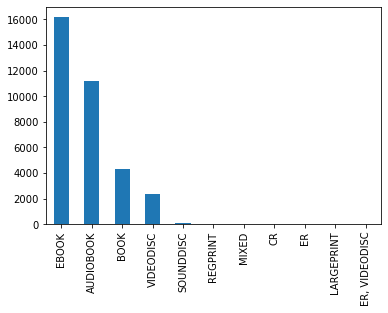

In [146]:
seattle_df['MaterialType'].value_counts().plot(kind='bar')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 
For example, to make a horizontal bar chart, we can set `kind='barh'`

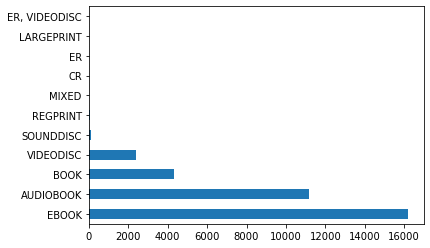

In [147]:
seattle_df['MaterialType'].value_counts().plot(kind='barh')

To make a pie chart, we can set `kind='pie'`

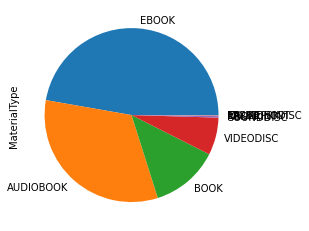

In [167]:
seattle_df['MaterialType'].value_counts().plot(kind='pie')

To save a plot as an image file or PDF file, we can assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.png')` or `ax.figure.savefig('FILE-NAME.pdf')`.

In [ ]:
ax = seattle_df['MaterialType'].value_counts().plot(kind='pie')
ax.figure.savefig('SPL-MaterialTypes.pdf')